# OSTEOPOROSIS RISK PREDICTION

ABOUT DATASET

The dataset was obtained from Kaggle and contains 15 columns with a total of 1958 records containing information about health factors influencing osteoporosis development, including demographic details, lifestyle choices, medical history, and bone health indicators.

POTENTIAL ANALYSIS

Predictive Modeling: Develop machine learning models to predict the probability of osteoporosis based on the provided features. This analysis is crucial for identifying individuals at risk of osteoporosis, enabling early intervention and prevention strategies.

Feature Importance Analysis: Determine the importance of each feature in predicting osteoporosis risk. Understanding which factors have the most significant impact on osteoporosis risk can provide insights into the underlying mechanisms and guide targeted interventions.

Correlation Analysis: Examine correlations between different features and osteoporosis risk. Identifying strong correlations can help identify potential risk factors or associations that may warrant further investigation or intervention.

## IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## IMPORTING AND PREPARING THE DATASET

In [ ]:
# Load the dataset
df = pd.read_csv('osteoporosis.csv')
df.head(10)

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1
5,1799320,41,Male,Normal,Yes,Caucasian,Normal,Low,Sufficient,Active,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
6,1577644,20,Male,Postmenopausal,Yes,African American,Underweight,Adequate,Sufficient,Sedentary,No,None,Rheumatoid Arthritis,None,No,1
7,1443912,39,Male,Postmenopausal,Yes,Asian,Normal,Adequate,Sufficient,Sedentary,No,None,Rheumatoid Arthritis,Corticosteroids,Yes,1
8,1379331,70,Male,Postmenopausal,No,Asian,Underweight,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
9,1824991,19,Female,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,None,Corticosteroids,Yes,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [ ]:
#Replacing null values
df["Alcohol Consumption"].fillna("None", inplace=True)
df["Medical Conditions"].fillna("None", inplace=True)
df["Medications"].fillna("None", inplace=True)

## Counts of different predictors against all the records.

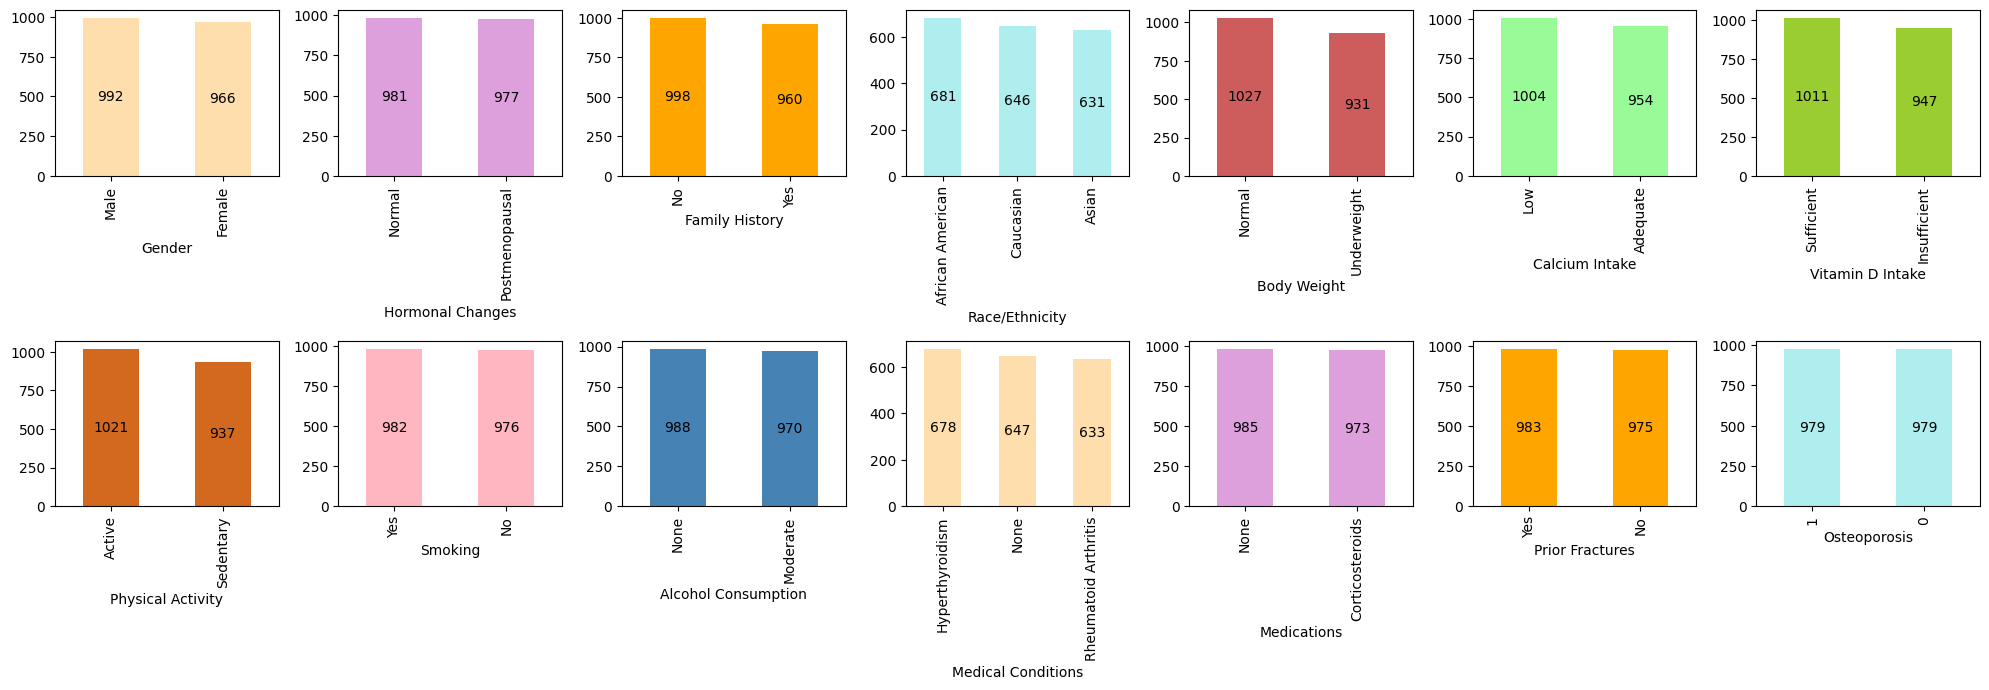

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 7))
index = 2
colors = ['lightpink', 'steelblue', 'navajowhite', 'plum', 'orange', 'paleturquoise', 'indianred','palegreen','yellowgreen','chocolate']  # Adjust colors as needed

for i in range(2):
    for j in range(7):
        column_name = df.columns[index]  # Get the current column name
        counts = df[column_name].value_counts()
        counts.plot(kind="bar", ax=axes[i][j], color=colors[index % len(colors)])
        axes[i][j].set_xlabel(column_name)  # Set x-axis label
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container, label_type="center")
        index += 1

plt.tight_layout()
plt.show()

## ANSWERING A FEW QUESTIONS USING THE DATASET
1. What is the average age of individuals in the dataset?



Average age: 39.10112359550562


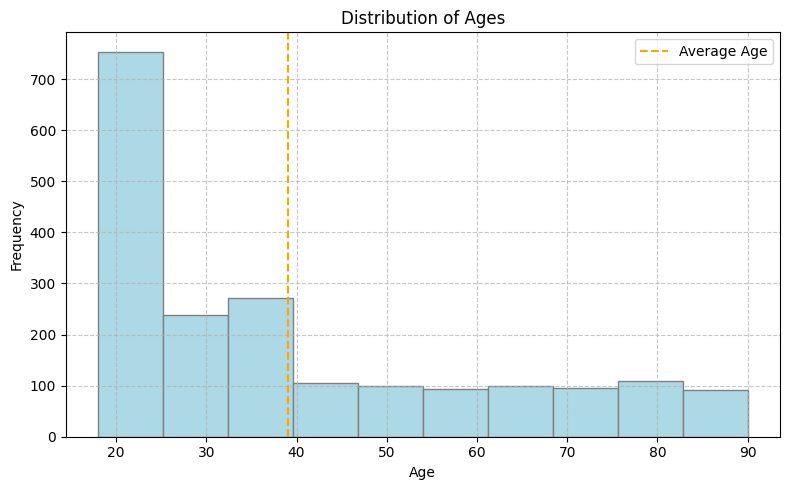

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average age
average_age = df['Age'].mean()

print("Average age:", average_age)

# Plotting
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=10, color='lightblue', edgecolor='grey')
plt.axvline(average_age, color='orange', linestyle='dashed', linewidth=1.5, label='Average Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


2. What percentage of individuals have experienced hormonal changes?
3. How is Osteoporosis related to hormonal changes?


Percentage of individuals with hormonal changes: 49.897854954034734
Chi-square statistic: 0.40041025127368834
P-value: 0.5268774620813865


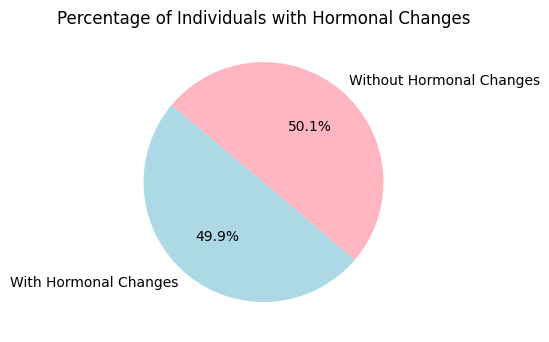

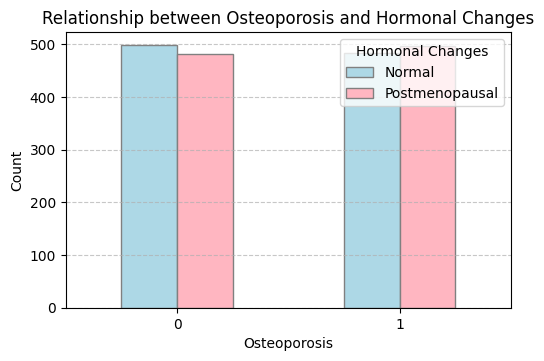

In [ ]:
from scipy.stats import chi2_contingency
# Calculate the percentage of individuals with hormonal changes
total_records = len(df)
hormonal_changes_count = df['Hormonal Changes'].value_counts().get('Postmenopausal', 0)
percentage_with_hormonal_changes = (hormonal_changes_count / total_records) * 100

print("Percentage of individuals with hormonal changes:", percentage_with_hormonal_changes)

# Perform chi-square test for the relationship between osteoporosis and hormonal changes
contingency_table = pd.crosstab(df['Osteoporosis'], df['Hormonal Changes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

# Plotting
labels = ['With Hormonal Changes', 'Without Hormonal Changes']
sizes = [percentage_with_hormonal_changes, 100 - percentage_with_hormonal_changes]
colors = ['lightblue', 'lightpink']

plt.figure(figsize=(7, 6))

# Plot pie chart for hormonal changes
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Individuals with Hormonal Changes')
plt.tight_layout(pad=10.0)


# Plot contingency table for osteoporosis and hormonal changes
plt.subplot(1, 1, 1)
contingency_table.plot(kind='bar', color=['lightblue', 'lightpink'], edgecolor='grey')
plt.xlabel('Osteoporosis')
plt.ylabel('Count')
plt.title('Relationship between Osteoporosis and Hormonal Changes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(pad=5.0)

CONCLUSION

**Percentage of individuals with hormonal changes**: Approximately 49.9% of individuals in the dataset have hormonal changes, specifically postmenopausal.

**Chi-square statistic**: The chi-square statistic is 0.400, indicating a relatively low value. This suggests that there may not be a strong association between osteoporosis and hormonal changes.

**P-value**: The p-value is 0.527, which is greater than the conventional significance level of 0.05. This means that we fail to reject the null hypothesis. In other words, there is insufficient evidence to conclude that there is a significant relationship between osteoporosis and hormonal changes in the dataset.

In conclusion, based on these values, we cannot confidently assert a significant relationship between osteoporosis and hormonal changes in the dataset.



4. Analyzing the distribution of osteoporosis risk based on age.




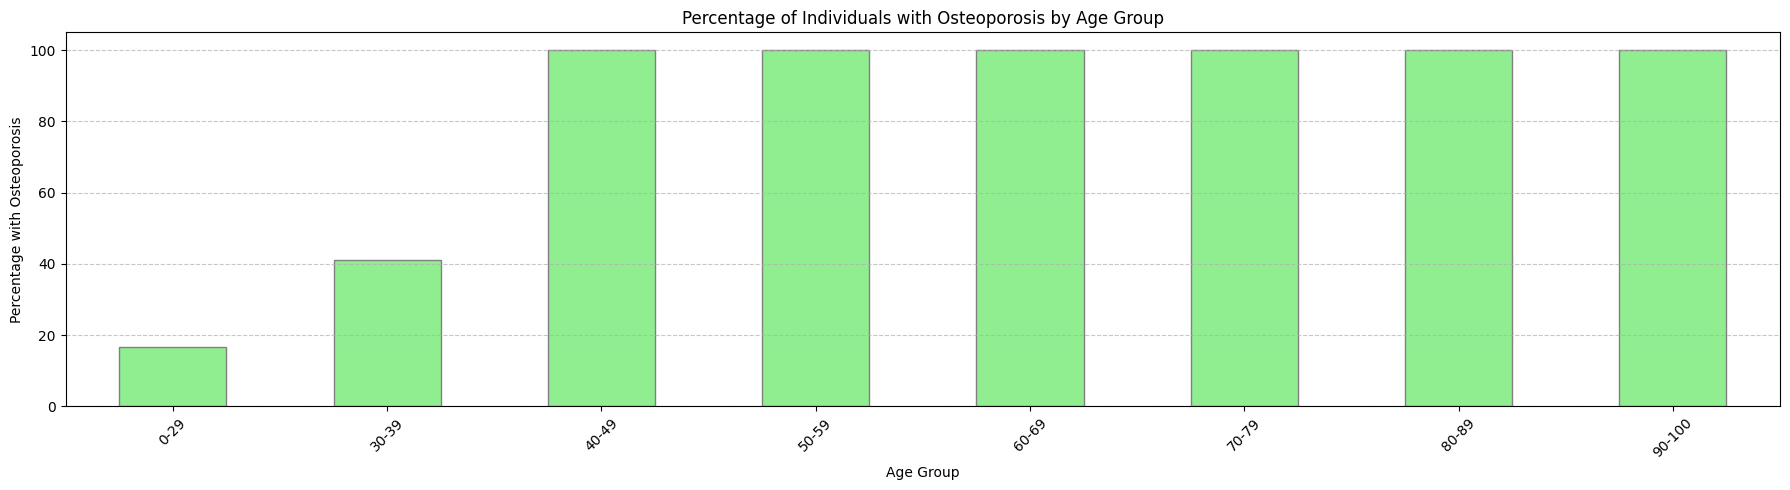

In [ ]:
# Define age groups
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the percentage of individuals with osteoporosis in each age group
age_group_counts = df.groupby('Age Group')['Osteoporosis'].mean() * 100

# Plotting
plt.figure(figsize=(18, 5))
age_group_counts.plot(kind='bar', color='lightgreen', edgecolor='grey')
plt.title('Percentage of Individuals with Osteoporosis by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage with Osteoporosis')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conclusion: People of age less than 50 are less likely to be diagonised with osteoporosis.



5. Is there a correlation between family history of osteoporosis and the likelihood of osteoporosis diagnosis?




Chi-square statistic: 0.0020436706746826986
P-value: 0.9639423339315779


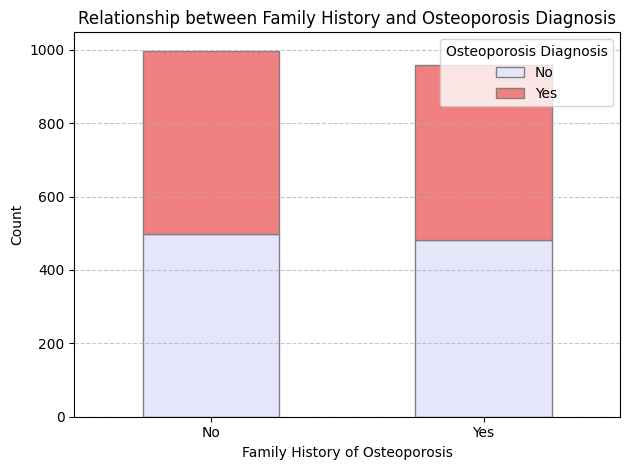

In [ ]:
import seaborn as sns
# Create a contingency table for family history of osteoporosis and osteoporosis diagnosis
contingency_table = pd.crosstab(df['Family History'], df['Osteoporosis'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

# Plotting
contingency_table.plot(kind='bar', stacked=True, color=['lavender', 'lightcoral'], edgecolor='grey')
plt.title('Relationship between Family History and Osteoporosis Diagnosis')
plt.xlabel('Family History of Osteoporosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Osteoporosis Diagnosis', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



CONCLUSION

Chi-square Statistic:

The chi-square statistic measures the strength of association between the two categorical variables (family history of osteoporosis and osteoporosis diagnosis).
In this case, the low chi-square statistic value (0.002) indicates a weak association between family history and osteoporosis diagnosis.

P-value:

The p-value represents the probability of observing the observed chi-square statistic (or more extreme values) if the variables were independent.
With a p-value of 0.964, which is much greater than the typical significance level of 0.05, we fail to reject the null hypothesis.

Therefore, we conclude that there is insufficient evidence to suggest a significant association between family history of osteoporosis and osteoporosis diagnosis.



6.  Is there a relationship between calcium intake and vitamin D intake w.r.t Osteoporosis?




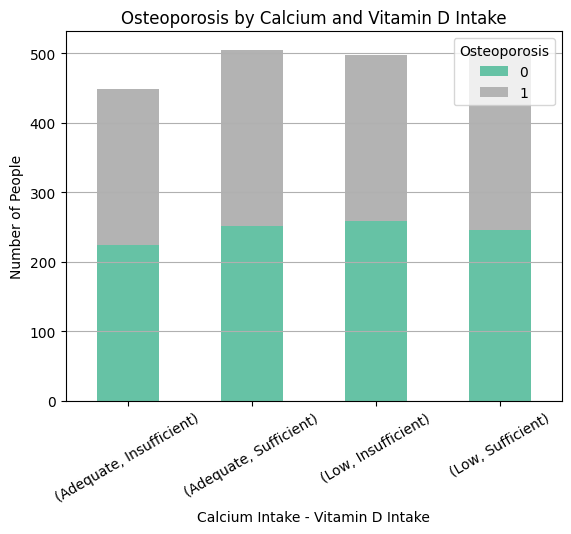

In [ ]:
data = pd.read_csv("osteoporosis.csv")
osteoporosis_counts = data.groupby(["Calcium Intake", "Vitamin D Intake"])["Osteoporosis"].value_counts().unstack(fill_value=0)

osteoporosis_counts.plot(kind="bar", stacked=True, colormap="Set2")
plt.xlabel("Calcium Intake - Vitamin D Intake")
plt.ylabel("Number of People")
plt.title("Osteoporosis by Calcium and Vitamin D Intake")
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.legend(title="Osteoporosis")
plt.grid(axis='y')  # Add gridlines for better visualization

plt.show()



7. Which of the predictors is a major influencing factor in Osteoporosis?




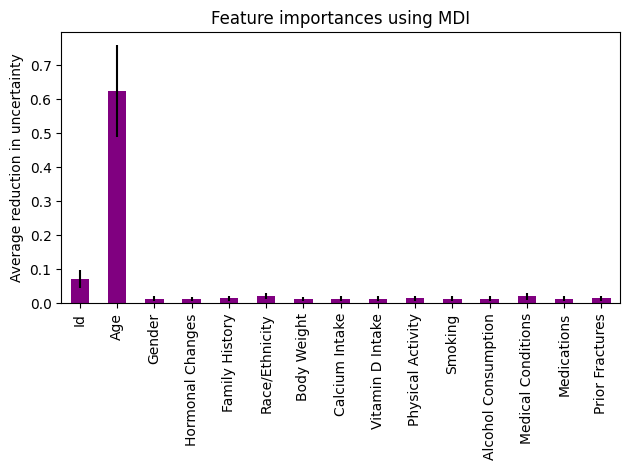

In [ ]:
# Encode categorical variables
le = LabelEncoder()
for i in df.columns[1:-1]:
    df[i] = le.fit_transform(df[i].values)

# Prepare data for training
x_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

# Scale the features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# Train the Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

# Extract feature importances
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=df.columns[:-1])

# Plot feature importances with custom color
fig, ax = plt.subplots()
forest_importances[:-1].plot.bar(yerr=std[:-1], ax=ax, color='purple')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Average reduction in uncertainty")
fig.tight_layout()

From the above graph, we can infer that 'Age' is the most influencing factor for Osteoporosis.

## CROSSTABS
Next, we have derived the crosstabs between all the patients and different predictors present in the dataset.

In [ ]:
color = np.zeros(len(df), dtype='uint8')
for i in df.columns[2:-1]:
    print(pd.crosstab(df[i], df[df.columns[-1]]))
    fig = px.parallel_categories(df[[i, df.columns[-1]]],dimensions=[i, df.columns[-1]], color=color, color_continuous_scale='inferno')
    fig.update_layout(coloraxis_showscale=False)
    fig.show()

Age Group  0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Gender                                                           
0           486    139     69     73     65     69     62       3
1           465    175     69     67     70     77     63       6


Age Group         0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Hormonal Changes                                                        
0                  477    168     58     73     62     70     65       8
1                  474    146     80     67     73     76     60       1


Age Group       0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Family History                                                        
0                488    152     68     68     72     74     72       4
1                463    162     70     72     63     72     53       5


Age Group       0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Race/Ethnicity                                                        
0                322    101     45     53     44     69     43       4
1                316    102     43     53     39     39     36       3
2                313    111     50     34     52     38     46       2


Age Group    0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Body Weight                                                        
0             520    154     63     69     72     78     67       4
1             431    160     75     71     63     68     58       5


Age Group       0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Calcium Intake                                                        
0                469    148     66     76     62     61     68       4
1                482    166     72     64     73     85     57       5


Age Group         0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Vitamin D Intake                                                        
0                  467    150     68     66     70     70     54       2
1                  484    164     70     74     65     76     71       7


Age Group          0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Physical Activity                                                        
0                   497    170     80     68     63     75     65       3
1                   454    144     58     72     72     71     60       6


Age Group  0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Smoking                                                          
0           477    157     73     79     63     61     62       4
1           474    157     65     61     72     85     63       5


Age Group            0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Alcohol Consumption                                                        
0                     464    160     69     71     69     66     64       7
1                     487    154     69     69     66     80     61       2


Age Group           0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Medical Conditions                                                        
0                    333     96     54     51     41     52     47       4
1                    323    113     38     45     36     49     41       2
2                    295    105     46     44     58     45     37       3


Age Group    0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Medications                                                        
0             475    152     73     65     75     73     57       3
1             476    162     65     75     60     73     68       6


Age Group        0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Prior Fractures                                                        
0                 478    149     59     72     69     69     73       6
1                 473    165     79     68     66     77     52       3


Age Group     0-29  30-39  40-49  50-59  60-69  70-79  80-89  90-100
Osteoporosis                                                        
0              794    185      0      0      0      0      0       0
1              157    129    138    140    135    146    125       9


## MODEL FOR PREDICTION

Preprocessing the data by encoding categorical features and handling missing values.

In [ ]:
def preprocess_data(data):
  """
  Preprocesses the data by encoding categorical features and handling missing values.
  """
  encoder = LabelEncoder()
  for col in data.columns:
    if data[col].dtype == 'object':
      data[col] = encoder.fit_transform(data[col])
  # Handle missing values (replace with most frequent or mean/median for numerical)
  # ... (implementation depends on data specifics)
  return data

Training a RandomForestClassifier model on the data.

In [ ]:
def train_model(data):

  features = data.drop('Osteoporosis', axis=1)
  target = data['Osteoporosis']
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  return model, X_test, y_test

Saving the trained model to a file.

In [ ]:
def save_model(model, filename):

  import pickle
  with open(filename, 'wb') as f:
    pickle.dump(model, f)

Predicting osteoporosis based on user input.

In [ ]:
def predict_osteoporosis(model, user_data):

  user_data = pd.DataFrame([user_data])
  user_data = preprocess_data(user_data)
  prediction = model.predict(user_data)[0]
  return prediction

Display a sample of the validation set data.

In [ ]:
def display_validation_data(X_test, y_test):

  sample = pd.concat([X_test.iloc[:5], y_test.iloc[:5]], axis=1)
  print("Sample of validation data:")
  print(sample)

'''def display_validation_data(X_test, y_test, encoder_dict):
  """
  Displays a sample of the validation set data with decoded features.

  Args:
      X_test: Testing data features.
      y_test: Testing data target labels.
      encoder_dict: Dictionary containing encoders for each categorical feature.
  """
  sample = pd.concat([X_test.iloc[:5], y_test.iloc[:5]], axis=1)
  # Decode categorical features back to original values
  for col in sample.columns:
    if col in encoder_dict:
      sample[col] = encoder_dict[col].inverse_transform(sample[col])
  print("Sample of validation data:")
  print(sample)'''

'def display_validation_data(X_test, y_test, encoder_dict):\n  """\n  Displays a sample of the validation set data with decoded features.\n\n  Args:\n      X_test: Testing data features.\n      y_test: Testing data target labels.\n      encoder_dict: Dictionary containing encoders for each categorical feature.\n  """\n  sample = pd.concat([X_test.iloc[:5], y_test.iloc[:5]], axis=1)\n  # Decode categorical features back to original values\n  for col in sample.columns:\n    if col in encoder_dict:\n      sample[col] = encoder_dict[col].inverse_transform(sample[col])\n  print("Sample of validation data:")\n  print(sample)'

Evaluate the model using the classification report.

In [ ]:
def evaluate_model(model, X_test, y_test):

  from sklearn.metrics import classification_report
  y_pred = model.predict(X_test)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

  # Print the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(cm)


  sns.heatmap(cm, annot=True, fmt='g', xticklabels=['No Osteoporosis', 'Osteoporosis'],
            yticklabels=['No Osteoporosis', 'Osteoporosis'])

# Customize the plot for clarity
  plt.ylabel('Prediction', fontsize=13)
  plt.xlabel('Actual Class', fontsize=13)
  plt.title('Osteoporosis Prediction - Confusion Matrix', fontsize=17)
  plt.show()

Importing Dataset and Preprocessing it.

In [ ]:
# Load the dataset
data = pd.read_csv("osteoporosis.csv")

# Preprocess the data
data = preprocess_data(data)

Training and saving the model.
Displaying Validation sample set.

In [ ]:
# Train the model
model, X_test, y_test = train_model(data)

# Save the model (optional)
save_model(model, "osteoporosis_model.pkl")

# Display validation data sample
display_validation_data(X_test, y_test)

Sample of validation data:
           Id  Age  Gender  Hormonal Changes  Family History  Race/Ethnicity  \
106   1638816   18       0                 0               1               0   
1236  1604429   29       0                 1               1               1   
1061  1178387   19       0                 0               1               2   
189   1264135   37       0                 0               0               2   
683   1811003   78       1                 0               1               2   

      Body Weight  Calcium Intake  Vitamin D Intake  Physical Activity  \
106             1               0                 1                  0   
1236            1               0                 0                  0   
1061            0               0                 0                  0   
189             1               0                 0                  0   
683             0               1                 1                  0   

      Smoking  Alcohol Consumption  Medical Con

User input and prediction.
Evaluating the model.

Enter Id: 1764875
Enter Age: 86
Enter Gender: female
Enter Hormonal Changes: postmenopausal
Enter Family History: no
Enter Race/Ethnicity: asian
Enter Body Weight: normal
Enter Calcium Intake: low
Enter Vitamin D Intake: insufficient
Enter Physical Activity: sedentary
Enter Smoking: no
Enter Alcohol Consumption: none
Enter Medical Conditions: Rheumatoid Arthritis
Enter Medications: Corticosteroids
Enter Prior Fractures: no
Osteoporosis risk: Negative
Enter 'q' to quit or any key to continue: q
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       185
           1       0.97      0.68      0.80       207

    accuracy                           0.82       392
   macro avg       0.85      0.83      0.82       392
weighted avg       0.86      0.82      0.82       392



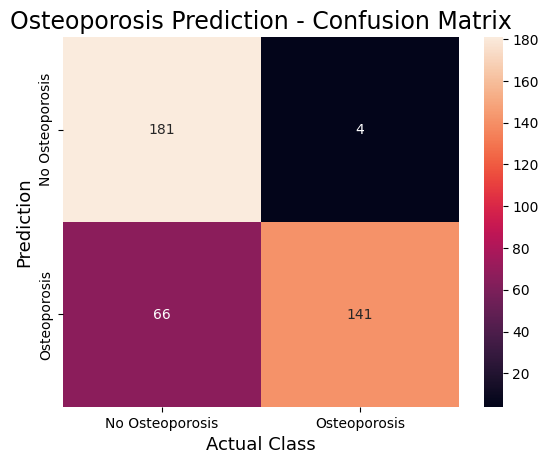

Model training and prediction complete!


In [ ]:
while True:
  user_data = {}
  for col in data.columns[:-1]:
    user_data[col] = input(f"Enter {col}: ")
  prediction = predict_osteoporosis(model, user_data)
  print(f"Osteoporosis risk: {'Positive' if prediction == 1 else 'Negative'}")

  # Option to exit the loop
  if input("Enter 'q' to quit or any key to continue: ") == 'q':
    break

# Evaluate the model (outside the loop)
evaluate_model(model, X_test, y_test)

print("Model training and prediction complete!")